In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [12]:
## Zeroadder
def zeroadder(x):
    x=int(x)
    if(x < 10):
        x = str('0')+ str(x)
    return str(x)

In [13]:
## Reading the market data file
df = pd.read_csv("https://raw.githubusercontent.com/NaveenKaliannan/Machine-learning/main/tutorials/Assignments/Assignments1/MarketData.csv")    
print(df.head())

         Date         Open         High          Low        Close  \
0  2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
1  2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
2  2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
3  2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
4  2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   

     Adj Close      Volume  
0  1455.219971   931800000  
1  1399.420044  1009000000  
2  1402.109985  1085500000  
3  1403.449951  1092300000  
4  1441.469971  1225200000  


In [14]:
## finding the days in each month
years= [zeroadder(i) for i in range(int(min(set(pd.DatetimeIndex(df['Date']).year))), int(max(set(pd.DatetimeIndex(df['Date']).year)))+1, 1)]
months= [zeroadder(i) for i in range(1, 13, 1)]
yearmonths={i+'-'+j:[] for i in years for j in months}
for i in yearmonths:
    for k in range(1,32,1):
        tmp=df.loc[df['Date'] == i+'-'+zeroadder(k)]            
        if(len(tmp) != 0 ):
            yearmonths[i].append(k)                    

In [15]:
## Calculating Monthly returns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')
mr={}
df_mr = pd.DataFrame(columns=['Year-Month','Month','Monthinnumbers','Monthly-Return'])
for i in yearmonths:
    if(len(yearmonths[i])>0):
        imax=max(yearmonths[i])
        imin=min(yearmonths[i])
        q1 = float(df['Close'].loc[df['Date'] == i+'-'+zeroadder(imax)])
        q2 = float(df['Close'].loc[df['Date'] == i+'-'+zeroadder(imin)])
        mr[i] = mr.get(i,round((q1/q2)-1.0,4))
        mon=list(set(df['Month'].loc[df['Date'] == i+'-'+zeroadder(imin)]))
        df_mr = df_mr.append({'Year-Month':  i,'Month': mon[0], 'Monthly-Return': round((q1/q2)-1.0,4), 'Monthinnumbers':i[-2]+i[-1] }, ignore_index=True)  
print(df_mr)        

    Year-Month Month Monthinnumbers  Monthly-Return
0      2000-01   Jan             01         -0.0418
1      2000-02   Feb             02         -0.0304
2      2000-03   Mar             03          0.0866
3      2000-04   Apr             04         -0.0356
4      2000-05   May             05         -0.0325
..         ...   ...            ...             ...
245    2020-06   Jun             06          0.0146
246    2020-07   Jul             07          0.0498
247    2020-08   Aug             08          0.0624
248    2020-09   Sep             09         -0.0464
249    2020-10   Oct             10          0.0305

[250 rows x 4 columns]


 Monthly Returns for Entire Dataset : 
 Min = -0.1656,
 25th-quantile = -0.0211,
 50th-quantile = 0.00765,
 75th-quantile = 0.0264,
 Max = 0.1789,
 Mean =0.0029216000000000008


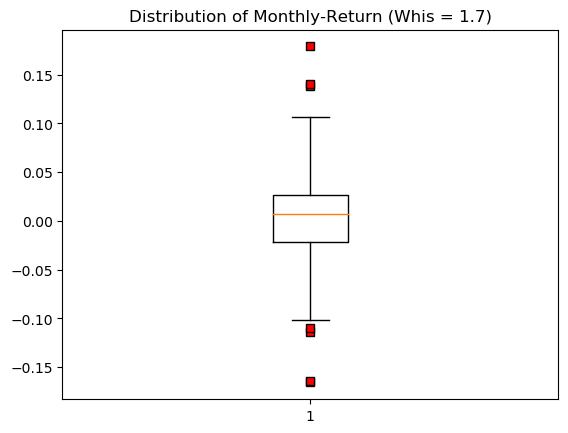

Outliers = [-0.1656, -0.1137, -0.1095, 0.1385, 0.1402, -0.1636, 0.1789],
Upper Bound = 0.10715,
Lower Bound = -0.10185


In [16]:
## Finding outliers from the montly returns datset
np_a = np.array(df_mr['Monthly-Return'])
print(" Monthly Returns for Entire Dataset : \n Min = {},\n 25th-quantile = {},\n 50th-quantile = {},\n 75th-quantile = {},\n Max = {},\n Mean ={}"
      .format(min(np_a), np.quantile(np_a, 0.25), np.quantile(np_a,0.5), np.quantile(np_a,0.75),  max(np_a),  np.mean(np_a)))

q3, q1 = np.percentile(np_a, [75 ,25])
iqr = q3 - q1

red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Monthly-Return (Whis = 1.7)')
ax1.boxplot(np_a, vert=True, flierprops=red_square, whis=1.7)
fig1.savefig("barplot.png", format="png")
plt.show()

## whis=1, 2.025σ 95 percent
## whis=1.5, 2.7σ  99 percent
## whis=1.7, 3σ  99.72 percent
## whis=2, 3.375σ  99.99 percent

outliers=[]
whis=1.7
Ubound=q3 + whis * iqr
Lbound=q1 - whis * iqr 
for i in np_a:
    if(i > Ubound or i < Lbound ):
        outliers.append(i)
print("Outliers = {},\nUpper Bound = {},\nLower Bound = {}".format(outliers, Ubound, Lbound ) )



In [17]:
## Removing outliers from the dataset
print("Shape b4 removing outliers = ",df_mr.shape)
df_mr = df_mr[(df_mr["Monthly-Return"] < Ubound) & (df_mr["Monthly-Return"] > Lbound)]
print("Shape after removing outlier = ",df_mr.shape)

for key, value in dict(mr).items():
    if value in outliers:
        del mr[key]



Shape b4 removing outliers =  (250, 4)
Shape after removing outlier =  (243, 4)


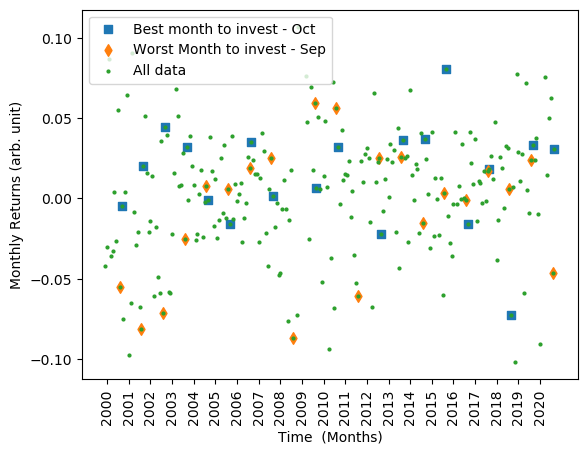

       Monthly-Return
Month                
Oct          0.014437
Apr          0.013735
Nov          0.011285
Dec          0.008280
Mar          0.007732
Jul          0.006810
Aug          0.001248
May         -0.000210
Jan         -0.001785
Jun         -0.005105
Feb         -0.005745
Sep         -0.008048


In [18]:
## Finding the best and worst month to invest
mr_max= max(mr.values())
mr_min= min(mr.values())
mrdate_max= ''
mrdate_min= ''
for k,v in mr.items():
    if(mr_max==v):
        mrdate_max= k
    elif(mr_min==v):
        mrdate_min= k

plt.figure() 
gf_mon =df_mr.groupby('Month').mean().sort_values(by='Monthly-Return',ascending=False)
maxmon=list(gf_mon.max())
minmon=list(gf_mon.min())
maxmon=maxmon[0]
minmon=minmon[0]
plt.scatter(list(df_mr.loc[df_mr["Month"] == gf_mon.index[0]].index), list(df_mr["Monthly-Return"].loc[df_mr["Month"] == gf_mon.index[0]]), s = 35, marker="s", label="Best month to invest - " + gf_mon.index[0] )
plt.scatter(list(df_mr.loc[df_mr["Month"] == gf_mon.index[-1]].index), list(df_mr["Monthly-Return"].loc[df_mr["Month"] == gf_mon.index[-1]]), s = 35, marker="d", label="Worst Month to invest - " + gf_mon.index[-1] )
plt.scatter(df_mr.index,df_mr['Monthly-Return'],s=4,label="All data")
plt.xticks(np.arange(1, 250, 12), np.arange(2000, 2021, 1), rotation='vertical')
plt.xlabel('Time  (Months)')    
plt.ylabel('Monthly Returns (arb. unit)')
plt.legend(loc='best')
plt.savefig("monthlyreturn.png", format="png")
plt.show()


def monthrating(rating):
    if rating > 0.01:
        return 'A_Strongprofit'
    if rating > 0 and rating <= 0.01:
        return 'B_Profit'
    if rating == 0:
        return 'C_NoGain'    
    if  rating < 0:
        return 'D_Loss'
    
gf_mon=gf_mon.sort_values(by=['Monthly-Return'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
print(gf_mon)    
gf_mon=gf_mon.sort_values(by=['Month'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
gf_mon['Rating'] = gf_mon['Monthly-Return'].map(monthrating)


In [19]:
## Best Months to invest based on Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing


def monthrating_qr(rating):
    if rating > 0.02:
        return 'A_Strongprofit'
    if rating > 0:
        return 'B_Profit'
    if rating == 0:
        return 'C_NoGain'    
    if rating < 0:
        return 'D_Loss'


##df_mr = df_mr.sort_values(by=['Month'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
X =  np.array(df_mr['Month'])
le = preprocessing.LabelEncoder()
X_train=le.fit_transform(X)
Y_train= np.array(df_mr['Monthly-Return'].map(monthrating_qr))
model = DecisionTreeClassifier()
model.fit(X_train.reshape(-1, 1), Y_train)
Xtest=np.arange(0,12,1)
predictions = model.predict(Xtest.reshape(-1, 1))
df_decisiontree=pd.DataFrame({"Month":le.inverse_transform(Xtest), "Investment":predictions})
df_decisiontree.sort_values(by=['Month'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Month,Investment
0,Apr,A_Strongprofit
1,Aug,D_Loss
2,Dec,B_Profit
3,Feb,D_Loss
4,Jan,D_Loss
5,Jul,D_Loss
6,Jun,D_Loss
7,Mar,B_Profit
8,May,D_Loss
9,Nov,A_Strongprofit


In [20]:
## Error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(gf_mon['Rating'], df_decisiontree['Investment']))
print(confusion_matrix(gf_mon['Rating'], df_decisiontree['Investment']))

from sklearn.metrics import accuracy_score
y_true = gf_mon['Rating']
y_predict = df_decisiontree['Investment']
print("Accuracy of my model = {}".format(accuracy_score(y_true, y_predict)))

                precision    recall  f1-score   support

A_Strongprofit       1.00      1.00      1.00         3
      B_Profit       1.00      0.50      0.67         4
        D_Loss       0.71      1.00      0.83         5

      accuracy                           0.83        12
     macro avg       0.90      0.83      0.83        12
  weighted avg       0.88      0.83      0.82        12

[[3 0 0]
 [0 2 2]
 [0 0 5]]
Accuracy of my model = 0.8333333333333334
